In [1]:
%matplotlib inline
import random
import numpy as np
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

Using Theano backend.


In [2]:
# open and read text file
file = open('C://Users//kurowasan//Desktop//analysis//poe.txt', encoding="utf8")
data = file.read()
file.close()

In [3]:
data[0:300]

'\ufeffProject Gutenberg’s The Works of Edgar Allan Poe, by Edgar Allan Poe\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online a'

In [4]:
# text preprocessing
data = data.lower()

In [5]:
# show letter distribution
import collections
letters = collections.Counter(data)
print("Total unique letters: {}".format(len(letters)))
letters

Total unique letters: 74


Counter({' ': 87180, 'e': 54768, 't': 40593, 'a': 33064, 'o': 31996, 'i': 31206, 'n': 29569, 's': 25824, 'r': 25154, 'h': 24376, 'd': 17041, 'l': 16380, 'u': 12774, 'c': 12135, 'f': 10901, 'm': 10688, '\n': 9226, 'p': 8798, 'w': 8600, ',': 7964, 'g': 7804, 'y': 7761, 'b': 6968, 'v': 4678, '.': 4080, '-': 2128, 'k': 2058, 'x': 831, '“': 726, ';': 629, '’': 612, 'j': 517, 'q': 503, '_': 492, '”': 486, 'z': 242, ')': 216, '!': 215, '(': 212, '?': 207, '‘': 202, '1': 181, '*': 164, '0': 127, '8': 103, ':': 98, '2': 90, '4': 76, '3': 60, '5': 56, '6': 46, '9': 35, 'ê': 34, 'æ': 34, 'é': 33, '7': 30, '/': 27, '‡': 23, 'è': 18, '†': 12, '[': 10, 'ô': 10, ']': 10, '$': 7, '~': 6, '¶': 3, 'â': 2, '&': 2, '@': 2, '\ufeff': 1, '#': 1, 'ö': 1, '%': 1, 'õ': 1})

In [6]:
l = list(letters.items())
l.sort(key=lambda x: x[1], reverse=True)
freq = [list(x) for x in zip(*l)]
freq[1] = [x/len(data) for x in freq[1]]

[' ', 'e', 't', 'a', 'o', 'i', 'n', 's', 'r', 'h', 'd', 'l', 'u', 'c', 'f', 'm', '\n', 'p', 'w', ',', 'g', 'y', 'b', 'v', '.', '-', 'k', 'x', '“', ';', '’', 'j', 'q', '_', '”', 'z', ')', '!', '(', '?', '‘', '1', '*', '0', '8', ':', '2', '4', '3', '5', '6', '9', 'ê', 'æ', 'é', '7', '/', '‡', 'è', '†', '[', 'ô', ']', '$', '~', '¶', 'â', '&', '@', '\ufeff', '#', 'ö', '%', 'õ']


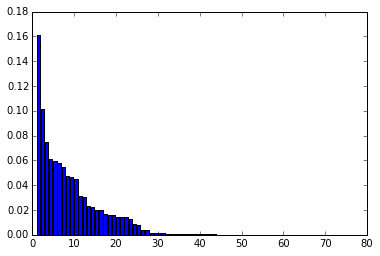

In [7]:
import matplotlib.pyplot as plt
plt.bar(left=np.linspace(1,len(freq[1]),len(freq[1])), height=freq[1])
print(freq[0])

In [8]:
# preprocessing 2 - remove the character with a frequency lesser than 0.01%
threshold = int(len(data)/10000)
to_remove = [x[0] for x in l if x[1] < threshold]

for c in to_remove:
    data = data.replace(c, '')  

In [9]:
data[0:300]

'project gutenberg’s the works of edgar allan poe, by edgar allan poe\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at'

In [10]:
# short version // TEMP
data = data[3000:4000]

In [12]:
text_file = open('C://Users//kurowasan//Desktop//analysis//poe_preprocessed.txt', "w", encoding="utf8")
text_file.write(data)
text_file.close()